In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

In [4]:
def norma2(N):
    n = 0
    for i in range(1,N+1):
        n += (2/(i*np.pi)*(np.cos(i*np.pi)-np.cos(i*np.pi/3)))**2
    return n/2

In [5]:
e = 2/3
h = 1
i = 1
while h > 10**(-3):
    h = abs(e - norma2(i))
    i += 1
print(i-1)

304


In [6]:
def fourier(x, N):
    res = 0
    for k in range(1, N+1):
        res += (2/(k*np.pi))*(np.cos(k*np.pi)-np.cos(k*np.pi/3))*np.sin(k*x)
    return res

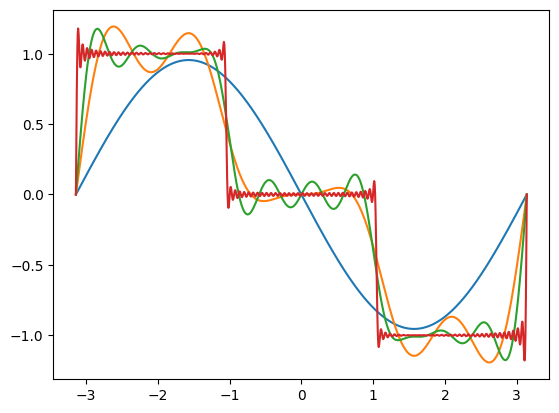

In [7]:
valores_N = [1,5,10,100]
x = np.linspace(-np.pi,np.pi,1000)

for j in valores_N:
    y = [fourier(i, j) for i in x]
    plt.plot(x, y)

In [ ]:
def reconstruction(x, tsampled, tsmooth, F_max):
    x_sinc = np.zeros(len(tsmooth))
    for n in range(0, len(tsampled)):
        x_sinc += x[n] * np.sinc((tsmooth-tsampled[n])*F_max)
    return x_sinc

def reconstruction_dt(x, tsampled, tsmooth):
    x_sinc = np.zeros(len(tsmooth))
    dt = tsampled[0] - tsampled[1]
    for n in range(0, len(tsampled)):
        x_sinc += x[n] * np.sinc((tsmooth-tsampled[n])/dt)
    return x_sinc

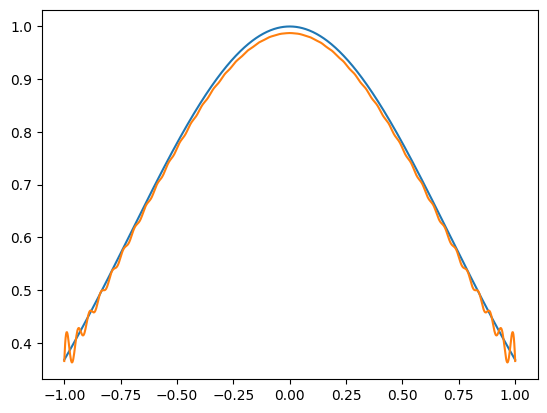

In [16]:
def y(f, t): 
    return np.exp(-t**2)
f = 10
tsampled = np.linspace(-1, 1, 80)
tsmooth = np.linspace(-1, 1, 1000)
ysampled = y(f, tsampled)
ysmooth = y(f, tsmooth)
yreconstruido = reconstruction(ysampled, tsampled, tsmooth, 40)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)

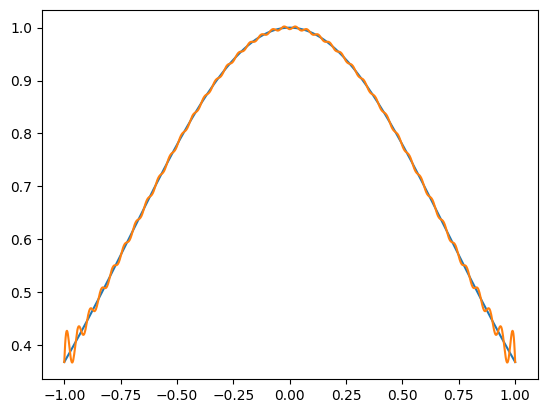

In [14]:
def y(f, t): 
    return np.exp(-t**2)
f=10
tsampled = np.linspace(-1, 1, 80)
tsmooth = np.linspace(-1, 1, 1000)
ysampled = y(f, tsampled)
ysmooth = y(f, tsmooth)
yreconstruido = reconstruction_dt(ysampled, tsampled, tsmooth)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)

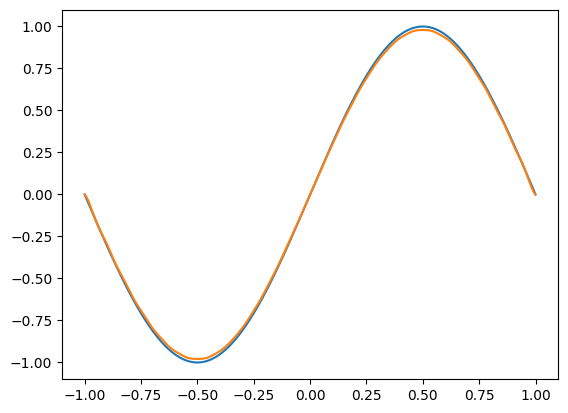

In [ ]:
def y(f, t): 
    return np.sin(np.pi*t)
f=1
tsampled = np.linspace(-1, 1, 50)
tsmooth = np.linspace(-1, 1, 800)
ysampled = y(f, tsampled)
ysmooth = y(f, tsmooth)
yreconstruido = reconstruction(ysampled, tsampled, tsmooth, 25)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)

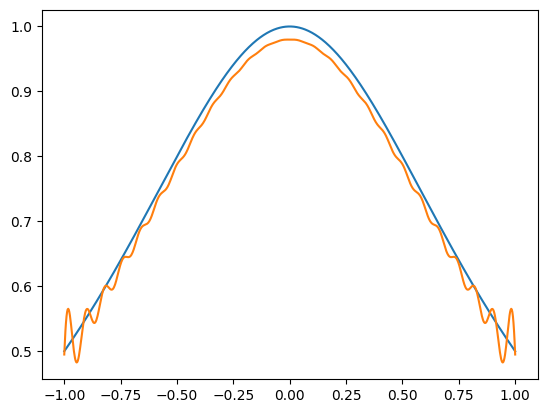

In [ ]:
def y(f, t): 
    return 1/(1+t**2)
f=10
tsampled = np.linspace(-1, 1, 50)
tsmooth = np.linspace(-1, 1, 800)
ysampled = y(f, tsampled)
ysmooth = y(f, tsmooth)
yreconstruido = reconstruction(ysampled, tsampled, tsmooth, 25)
plt.plot(tsmooth, ysmooth)
plt.plot(tsmooth, yreconstruido)

In [ ]:
x = [1, -1j, -1, 1j]
fft(x)

array([0.+0.j, 0.+0.j, 0.+0.j, 4.+0.j])

In [ ]:
def vectorN(N):
    return np.array([-3+6*k/N for k in range(0,N+1)])

In [ ]:
def f(x):
    if -1 <= x and x <= 1:
        return 1
    else:
        return 0
    
def g(x):
    return np.exp(-x**2)

In [ ]:
def shannon(f,x,v):
    res = 0
    dx = v[1]-v[0]
    for i in range(len(v)):
        res += f(v[i])*np.sinc((x-v[i])/dx)
    return res

In [ ]:
v = vectorN(100)
x = np.arange(-3,3,0.01)
f_s = [shannon(f, i, v) for i in x]
f_r = [f(i) for i in x]
g_s = [shannon(g, i, v) for i in x]
g_r = [g(i) for i in x]

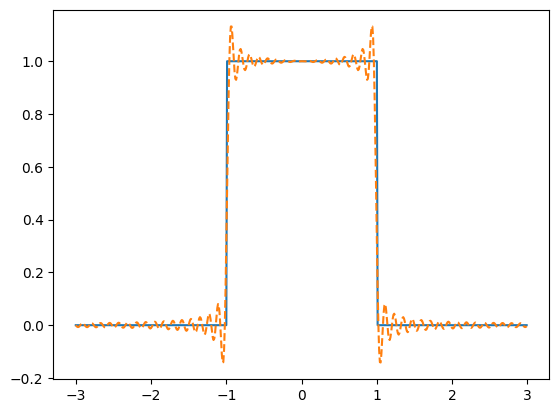

In [ ]:
plt.plot(x, f_r)
plt.plot(x, f_s, linestyle="--")

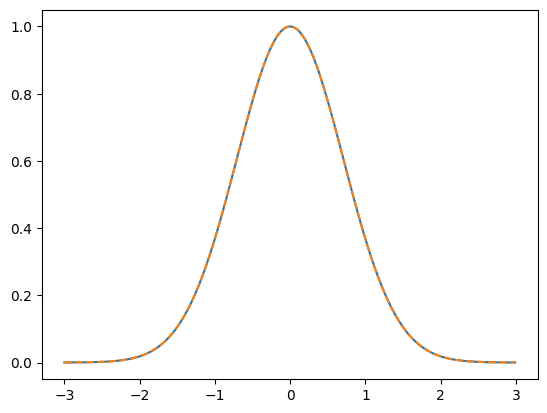

In [ ]:
plt.plot(x, g_r)
plt.plot(x, g_s, linestyle="--")

Lo que tiene $e^{-x^2}$ es que es re contra continua derivable y suave, entonces la convergencia de la reconstruccion no tiene drama, en cambio la caracteristica tiene dos puntos de discontinuidad, entonces para poder aproximar mas o menos bien tiene que generar cierto error que esta relacionado con el fenomeno de Gibbs. 

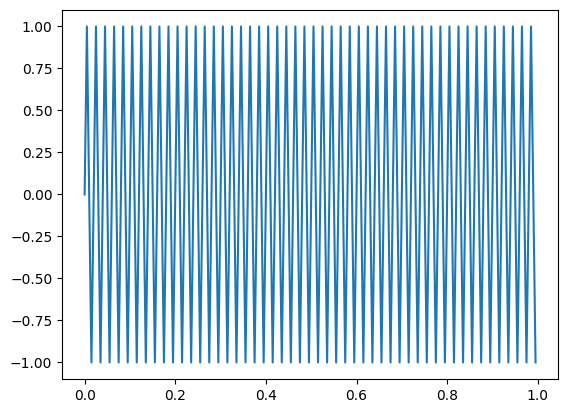

In [ ]:
N = 200 #Cant puntos que tomo
dt = 1/200 # Delta tiempo
Fs = 200 #Frecuencia de sampleo
t = np.arange(0, N, 1) * dt 

s = np.sin(2*(np.pi)*50*t)
plt.plot(t,s)

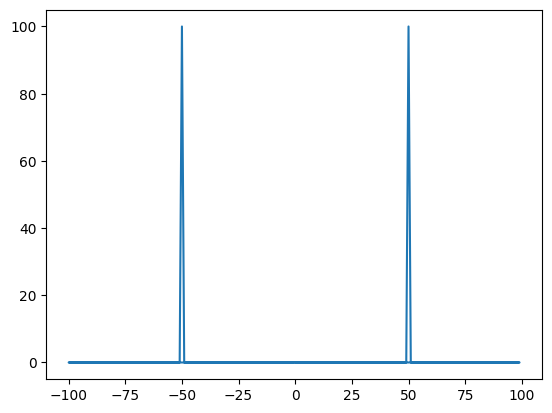

In [ ]:
s_f = np.fft.fft(s)
freq = np.fft.fftfreq(N, dt)
plt.plot(freq, np.abs(s_f))

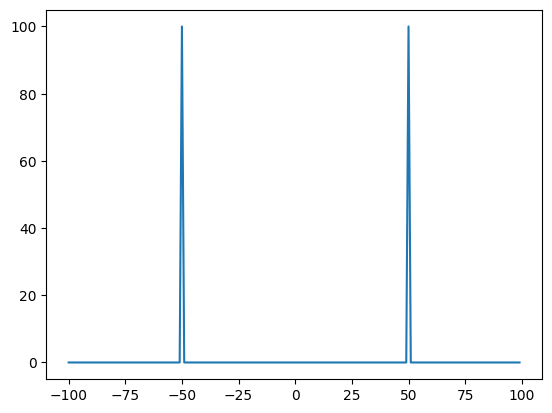

In [ ]:
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(s_f)))

In [ ]:
np.fft.fftshift([8,2,15,4,-1]) #Buscar, la idea es que "pega" la vuelta

array([ 4, -1,  8,  2, 15])

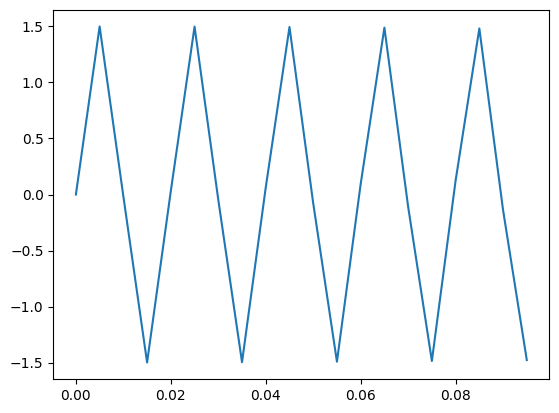

In [ ]:
N = 20 #Cant punto que tomo
dt = 1/200 # Delta tiempo
Fs = 200 #Frecuencia de sampleo
t = np.arange(0, N, 1) * dt 

s = np.sin(2*(np.pi)*50*t) + 0.5*np.sin(2*(np.pi)*50.5*t)
plt.plot(t,s)

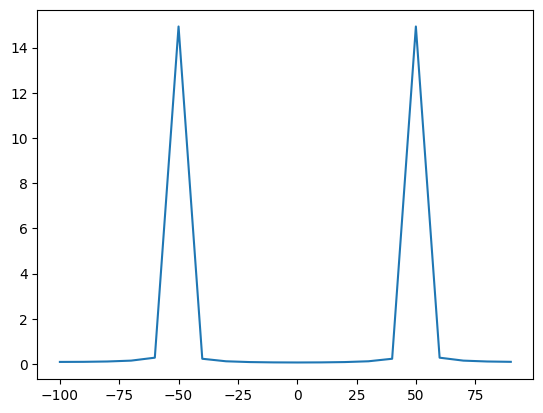

In [ ]:
s_f = np.fft.fft(s)
freq = np.fft.fftfreq(N, dt)
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(s_f)))

In [ ]:
w = np.hanning(N)

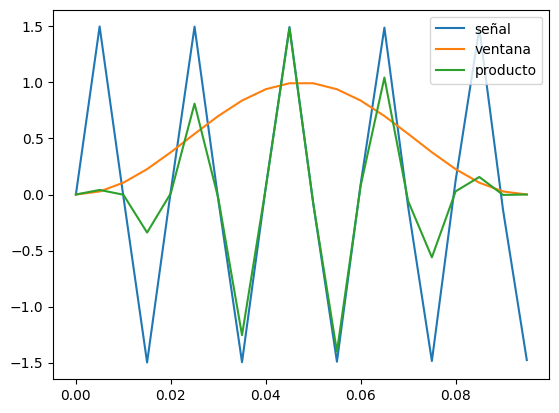

In [ ]:
plt.plot(t, s, t, w, t, s*w)
plt.legend(["señal", "ventana", "producto"])

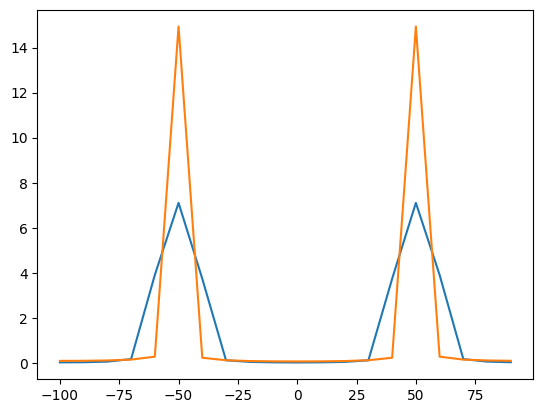

In [ ]:
sw_f = np.fft.fft(s*w)
freq = np.fft.fftfreq(N, dt)
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(sw_f)))
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(s_f)))

In [1]:
def f(x):
    res = 5*np.sin(4*np.pi*x)-3*np.sin(8*np.pi*x)
    return res

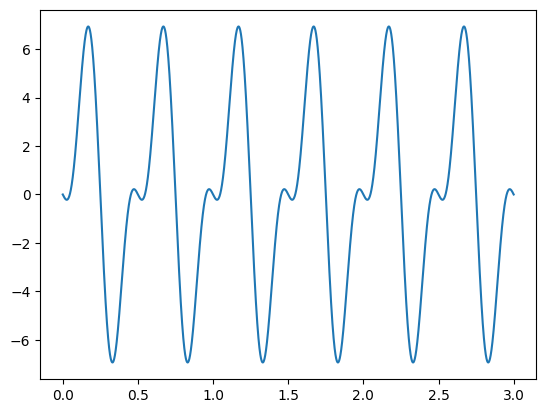

In [7]:
x = np.linspace(0,3,10000)

plt.plot(x, f(x))